In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.neighbors import KNeighborsClassifier



    # Original dataset for ramdon sampling (3 million rows)

                """
                # Loading the original dataset

                file_path = r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\twcs\twcs.csv'
                data = pd.read_csv(file_path)

                # Sampling the data (creating a 50,000 rows subset)

                data = data.sample(n=50000, random_state=42)

                # Saving the sampled data to a new CSV file

                output_file_path = r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\twcs\sampled_data_2.csv'
                data.to_csv(output_file_path, index=False)
                """

## Abstract
This research aims to predict customer satisfaction to provide actionable recommendations for customer service improvement. A dataset originally comprising over 2.9 million rows was sampled down to a subset of 50,000 rows with seven key features. Comprehensive data exploration was conducted, including duplicate detection, descriptive statistics, and feature-by-feature analysis. Specialized text analysis was implemented to engineer sentiment, text length, and word count features. These engineered features were foundational in predicting satisfaction and sentiment. 

Models including Random Forest, K-Nearest Neighbors (KNN), and Logistic Regression were trained using these features, with Logistic Regression being selected for final satisfaction classification. Random Forest, while discarded for classification, was leveraged for insight analysis and recommendation generation. This hybrid approach combines predictive modeling with actionable insights, culminating in a Random Forest-based recommendation system for low-satisfaction customers.
## Methods
### Data Preparation
1. **Dataset Sampling**: A random sample of 50,000 rows was selected from the original dataset of over 2.9 million rows.
2. **Feature Selection**: Seven columns were identified and loaded into a Pandas DataFrame for analysis.
3. **Data Exploration**:
   - Inspection of the first few rows of data.
   - Detection and removal of duplicate entries.
   - Summary statistics using `info()` and `describe()` functions.
   - Feature-by-feature observation for data quality and distribution.
### Feature Engineering
1. **Text Analysis**:
   - Sentiment Analysis: Derived sentiment scores for textual data.
   - Text Length and Word Count: Computed as additional predictive features.
2. **Target Variable Creation**:
   - Satisfaction levels were categorized into buckets (e.g., Low, Medium, High).
   - Sentiment and satisfaction features were preserved to define predictors (X) and targets (Y).
### Model Training
1. **Algorithms Used**:
   - Random Forest: Tested for both classification and insight generation.
   - K-Nearest Neighbors (KNN): Evaluated for predictive accuracy.
   - Logistic Regression: Selected for final satisfaction classification.
2. **Validation**:
   - Cross-validation techniques were employed to ensure model robustness.
   - Performance metrics, including accuracy, precision, recall, and F1-score, were assessed.
### Insights and Recommendations
- Low-satisfaction customers were analyzed for feature-specific trends using Random Forest insights.
- Recommendations were generated based on patterns observed, such as addressing delayed responses and refining inbound communication processes.
## Documentation
1. **Notebook Structure**:
   - Clear section headers for data preparation, feature engineering, modeling, and insights.
   - Inline comments to explain each code block's purpose.
   - Results and plots are labeled and described to aid understanding.

2. **Reproducibility**:
   - Key libraries and dependencies are listed at the start of the notebook.
   - Code is modularized where possible for reusability.
   - Outputs and visualizations are saved for easy review.

3. **File Organization**:
   - A copy of the file includes full documentation and organized code to ensure clarity and accessibility for stakeholders.

This structured approach ensures the study's findings are actionable, replicable, and presented in a user-friendly format.

# The Dataset
- kaggle
- Data Source: Twitter.
- The original dataset contains over 2.9 million rows.
- A 50,000 rows sample has been created and saved as csv for better data manipulation.
- The dataset is distributed across 7 features

# Loading a 50,000 rows subset

In [3]:
data = pd.read_csv(r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\twcs\sampled_data_2.csv')
print("Dataset loaded. Shape:", data.shape)

Dataset loaded. Shape: (50000, 7)


# Exploration

    # Visualizing the fist rows

In [4]:
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,192624,161253,True,Wed Oct 04 13:59:33 +0000 2017,@161252 What's that egg website people talk about,192623,192625.0
1,738238,296574,True,Fri Oct 06 18:29:06 +0000 2017,Why!🤷🏻‍♀️ #iOS11 @AppleSupport https://t.co/BX...,738237,NaN
2,2414302,AppleSupport,False,Tue Nov 14 17:38:01 +0000 2017,@693975 We can assist you. We recommend updati...,2414303,2414304.0
3,1793929,539096,True,Thu Oct 12 06:04:41 +0000 2017,@331912 @115955 Thats better than having an un...,1793928,1793930.0
4,2088018,617376,True,Mon Nov 06 20:30:49 +0000 2017,@VirginAmerica is probably one of the best air...,2088017,NaN


    # Visualizing the data info

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 50000 non-null  int64  
 1   author_id                50000 non-null  object 
 2   inbound                  50000 non-null  bool   
 3   created_at               50000 non-null  object 
 4   text                     50000 non-null  object 
 5   response_tweet_id        31516 non-null  object 
 6   in_response_to_tweet_id  35869 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 2.3+ MB
None


    # Visualizing the dataset statistics

In [6]:
print(data.describe(include='all'))

            tweet_id   author_id inbound                      created_at  \
count   5.000000e+04       50000   50000                           50000   
unique           NaN       26395       2                           49675   
top              NaN  AmazonHelp    True  Fri Nov 03 10:36:00 +0000 2017   
freq             NaN        2955   27304                               3   
mean    1.507190e+06         NaN     NaN                             NaN   
std     8.601904e+05         NaN     NaN                             NaN   
min     1.620000e+02         NaN     NaN                             NaN   
25%     7.684808e+05         NaN     NaN                             NaN   
50%     1.508696e+06         NaN     NaN                             NaN   
75%     2.249166e+06         NaN     NaN                             NaN   
max     2.987924e+06         NaN     NaN                             NaN   

                   text response_tweet_id  in_response_to_tweet_id  
count             

    # Visualizing duplicate rows 

In [7]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


# Feature content exploration

    # Observation

In [8]:
observations = {}
for col in data.columns:
    observations[col] = {
        'total_count': data[col].size,
        'nan_count': data[col].isna().sum(),
        'dtype': data[col].dtype,
        'mean': data[col].mean() if data[col].dtype in ['int64', 'float64'] else None,
        'unique_count': data[col].nunique(),
        'categories': data[col].value_counts().head(10).to_dict() if data[col].dtype == 'object' or data[col].nunique() <= 10 else None
    }

for feature, details in observations.items():
    print(f"Feature: {feature}")
    for key, value in details.items():
        print(f"  {key}: {value}")
    print()

Feature: tweet_id
  total_count: 50000
  nan_count: 0
  dtype: int64
  mean: 1507190.30118
  unique_count: 50000
  categories: None

Feature: author_id
  total_count: 50000
  nan_count: 0
  dtype: object
  mean: None
  unique_count: 26395
  categories: {'AmazonHelp': 2955, 'AppleSupport': 1930, 'Uber_Support': 966, 'Delta': 788, 'SpotifyCares': 741, 'Tesco': 665, 'AmericanAir': 656, 'TMobileHelp': 638, 'comcastcares': 578, 'British_Airways': 539}

Feature: inbound
  total_count: 50000
  nan_count: 0
  dtype: bool
  mean: None
  unique_count: 2
  categories: {True: 27304, False: 22696}

Feature: created_at
  total_count: 50000
  nan_count: 0
  dtype: object
  mean: None
  unique_count: 49675
  categories: {'Fri Nov 03 10:36:00 +0000 2017': 3, 'Tue Nov 07 14:37:27 +0000 2017': 3, 'Sat Oct 28 10:45:29 +0000 2017': 2, 'Sun Dec 03 19:44:00 +0000 2017': 2, 'Fri Oct 20 16:03:45 +0000 2017': 2, 'Wed Oct 25 19:16:01 +0000 2017': 2, 'Mon Oct 30 15:43:15 +0000 2017': 2, 'Fri Nov 10 15:31:20 +0000

    # Observation plotting

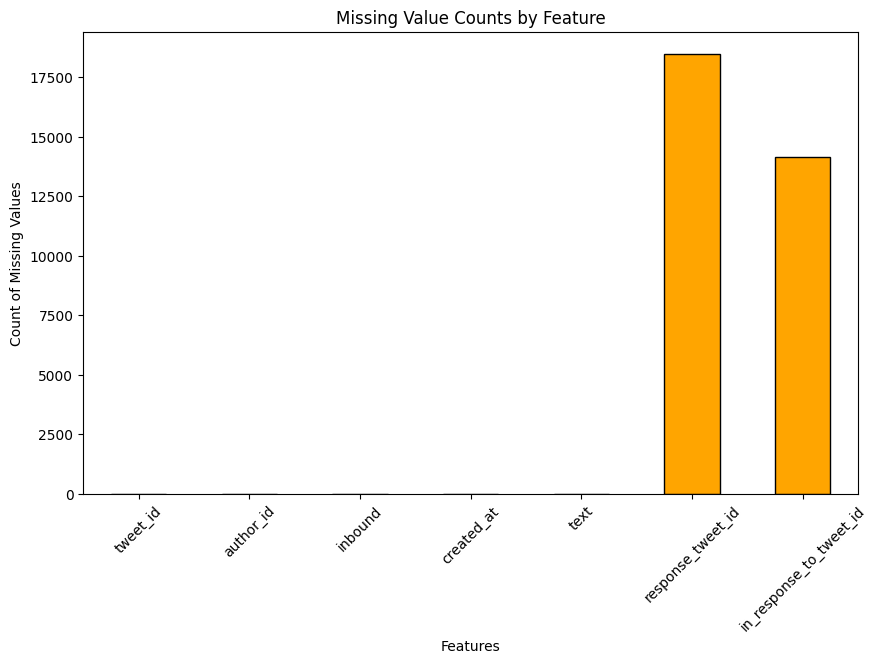

In [9]:
plt.figure(figsize=(10, 6))
data.isna().sum().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Missing Value Counts by Feature')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.show()

# Feature by feature transformation

    # Data type conversions and preprocessing

In [10]:
# Feature: in_response_to_tweet_id
data['in_response_to_tweet_id'] = data['in_response_to_tweet_id'].fillna(-1.0).astype('int64')

# Feature: response_tweet_id
data['response_tweet_id'] = pd.to_numeric(data['response_tweet_id'], errors='coerce').fillna(-1).astype('int64')

# Feature: inbound - Binarize and convert to int64
data['inbound'] = data['inbound'].map({True: 0, False: 1}).fillna(-1).astype('int64')

# Feature: created_at - convert created_at to epoch time for modeling
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce').astype('int64') // 10**9

# Feature: author_id - encode author_id as integer categories
data['author_id'] = data['author_id'].astype('category').cat.codes

# Feature: tweet_id - is already int64

C:\Users\jcbur\AppData\Local\Temp\ipykernel_13436\4096053926.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce').astype('int64') // 10**9


    # Performing text-based sentiment analysis: `sentiment` feature

In [11]:
def analyze_sentiment(texts):
    return [TextBlob(text).sentiment.polarity if isinstance(text, str) else None for text in texts]

data['sentiment'] = analyze_sentiment(data['text'])


    # Visualize sentiment distribution

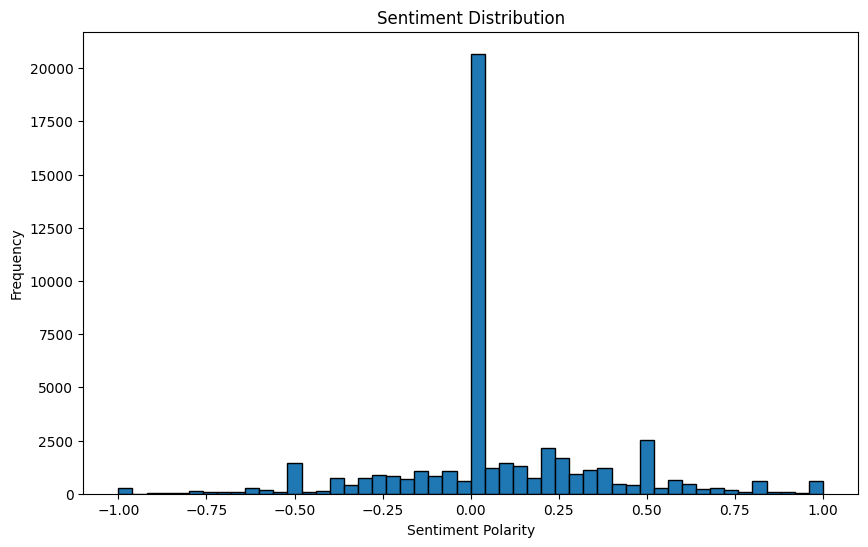

In [12]:

plt.figure(figsize=(10, 6))
plt.hist(data['sentiment'].dropna(), bins=50, edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

    # Adding features for text length and word count

In [13]:
# text length
max_text_length = data['text'].apply(len).max()
data['text_length'] = data['text'].apply(len) / max_text_length

# word count
max_word_count = data['text'].apply(lambda x: len(x.split())).max()
data['word_count'] = data['text'].apply(lambda x: len(x.split())) / max_word_count

    # Engineering a 'satisfaction' feature combining sentiment, text length, and word count

In [14]:

data['satisfaction'] = (data['sentiment'] + data['text_length'] + data['word_count']) / 3

    # Dropping redundant features

In [15]:
data.drop(['text_length', 'word_count'], axis=1, inplace=True)

    # Visualizing the datatypes

In [16]:
print(data.dtypes)

tweet_id                     int64
author_id                    int16
inbound                      int64
created_at                   int64
text                        object
response_tweet_id            int64
in_response_to_tweet_id      int64
sentiment                  float64
satisfaction               float64
dtype: object


    # Visualizing the dataframe

In [17]:
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,sentiment,satisfaction
0,192624,2586,0,1507125573,@161252 What's that egg website people talk about,192623,192625,0.0,0.073483
1,738238,8509,0,1507314546,Why!🤷🏻‍♀️ #iOS11 @AppleSupport https://t.co/BX...,738237,-1,0.0,0.058989
2,2414302,26297,1,1510681081,@693975 We can assist you. We recommend updati...,2414303,2414304,0.0,0.293219
3,1793929,17806,0,1507788281,@331912 @115955 Thats better than having an un...,1793928,1793930,0.5,0.298467
4,2088018,20049,0,1510000249,@VirginAmerica is probably one of the best air...,2088017,-1,0.9,0.406035


# Correlation analysis

    # Producing a correlation matrix with 'sentiment' as the target variable (y)

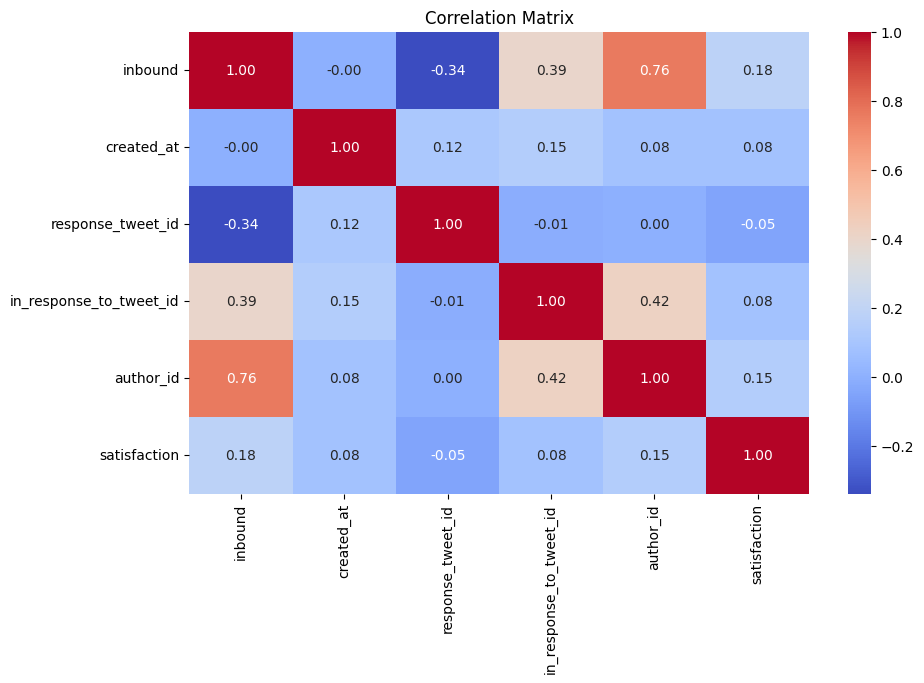

Correlation of features with satisfaction:
satisfaction               1.000000
inbound                    0.180935
author_id                  0.146936
created_at                 0.084466
in_response_to_tweet_id    0.083100
response_tweet_id         -0.046771
Name: satisfaction, dtype: float64


In [18]:
correlation_matrix = data[['inbound', 'created_at', 'response_tweet_id', 'in_response_to_tweet_id', 'author_id', 'satisfaction']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

satisfaction_correlation = correlation_matrix['satisfaction'].sort_values(ascending=False)
print("Correlation of features with satisfaction:")
print(satisfaction_correlation)

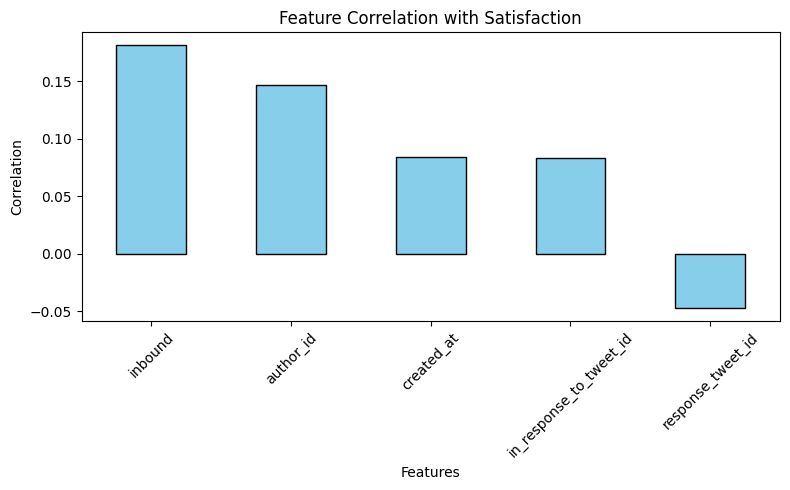

In [19]:
plt.figure(figsize=(8, 5))
satisfaction_correlation.drop('satisfaction').plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Feature Correlation with Satisfaction')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Testing models for satisfaction classification

    # Prepare, Train, Test and Split

In [20]:
# For KNN and Logistic Regression
X_knn_lr = data[['inbound', 'created_at', 'author_id', 'response_tweet_id', 'in_response_to_tweet_id']].fillna(-1)
y_knn_lr = pd.cut(data['satisfaction'], bins=[-1, 0.33, 0.67, 1], labels=[0, 1, 2]).astype(int)

# For Random Forest (using sentiment as a categorical feature)
X_rf = data[['inbound', 'created_at', 'author_id', 'response_tweet_id', 'in_response_to_tweet_id']].fillna(-1)
y_rf = pd.cut(data['sentiment'], bins=[-1, -0.5, 0, 0.5, 1], labels=[0, 1, 2, 3])
y_rf = y_rf.fillna(0).astype(int)  # Fill NaN in y_rf with a default category

# Split data for KNN and Logistic Regression
X_train_knn_lr, X_test_knn_lr, y_train_knn_lr, y_test_knn_lr = train_test_split(X_knn_lr, y_knn_lr, test_size=0.2, random_state=42)

# Split data for Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

    # Ensure feature selection consistency

In [21]:
print("Shapes for KNN and Logistic Regression")
print("X_train_knn_lr:", X_train_knn_lr.shape, "y_train_knn_lr:", y_train_knn_lr.shape)
print("Shapes for Random Forest")
print("X_train_rf:", X_train_rf.shape, "y_train_rf:", y_train_rf.shape)

Shapes for KNN and Logistic Regression
X_train_knn_lr: (40000, 5) y_train_knn_lr: (40000,)
Shapes for Random Forest
X_train_rf: (40000, 5) y_train_rf: (40000,)


# Model testing

    # Training random forest 

In [22]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_model.predict(X_test_rf)
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)

    # Train Logistic Regression

In [23]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_knn_lr, y_train_knn_lr)
y_pred_lr = lr_model.predict(X_test_knn_lr)
lr_accuracy = accuracy_score(y_test_knn_lr, y_pred_lr)

c:\Users\jcbur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    # Training KNN

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # Choose k based on validation
knn_model.fit(X_train_knn_lr, y_train_knn_lr)
y_pred_knn = knn_model.predict(X_test_knn_lr)
knn_accuracy = accuracy_score(y_test_knn_lr, y_pred_knn)

    # Evaluating Models

In [25]:
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("KNN Accuracy:", knn_accuracy)

Random Forest Accuracy: 0.4967
Logistic Regression Accuracy: 0.8397
KNN Accuracy: 0.8151


    # Ensuring numeric values for model_accuracies

In [26]:
model_accuracies = {
    'Random Forest': float(rf_accuracy),
    'Logistic Regression': float(lr_accuracy),
    'KNN': float(knn_accuracy)
}

    # Plotting accuracy comparison

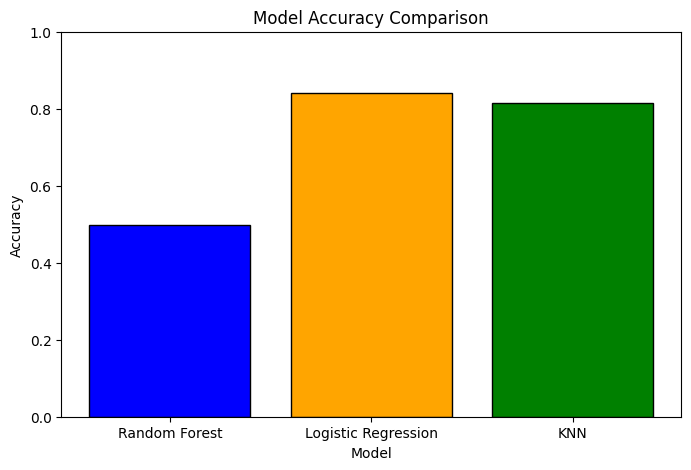

In [27]:
plt.figure(figsize=(8, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'orange', 'green'], edgecolor='black')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Satisfaction Classification using Logistic Regression

    - Logistic Regression is unlikely to overfit, its 83.97% accuracy guarantees new data processing
    - Logistic Regression for an acctionable satisfaction classification to improve customer service

    # Preparing data for satisfaction classification

In [28]:
X_satisfaction = data[['inbound', 'created_at', 'author_id', 'response_tweet_id', 'in_response_to_tweet_id']]
y_satisfaction = pd.cut(data['satisfaction'], bins=[-1, 0.33, 0.67, 1], labels=['Low', 'Medium', 'High']).astype(str)

    # Preparing for logistic regression analysis

In [29]:
X_train_satisfaction, X_test_satisfaction, y_train_satisfaction, y_test_satisfaction = train_test_split(
    X_satisfaction, y_satisfaction, test_size=0.2, random_state=42)

    # Training Logistic Regression model

In [30]:
lr_satisfaction_model = LogisticRegression(random_state=42)
lr_satisfaction_model.fit(X_train_satisfaction, y_train_satisfaction)
y_pred_satisfaction = lr_satisfaction_model.predict(X_test_satisfaction)

c:\Users\jcbur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    # Model evaluation

In [31]:
satisfaction_accuracy = accuracy_score(y_test_satisfaction, y_pred_satisfaction)
print("Logistic Regression Satisfaction Accuracy:", satisfaction_accuracy)
print("Classification Report (Satisfaction):\n", classification_report(y_test_satisfaction, y_pred_satisfaction))

Logistic Regression Satisfaction Accuracy: 0.8397


c:\Users\jcbur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report (Satisfaction):
               precision    recall  f1-score   support

        High       0.00      0.00      0.00         2
         Low       0.84      1.00      0.91      8397
      Medium       0.00      0.00      0.00      1601

    accuracy                           0.84     10000
   macro avg       0.28      0.33      0.30     10000
weighted avg       0.71      0.84      0.77     10000



c:\Users\jcbur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jcbur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


    # Plot feature importance for interpretability and confusion matrix

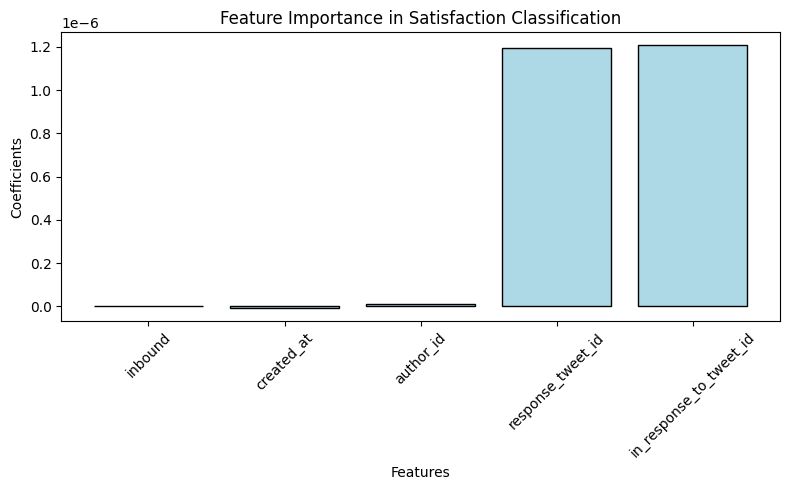

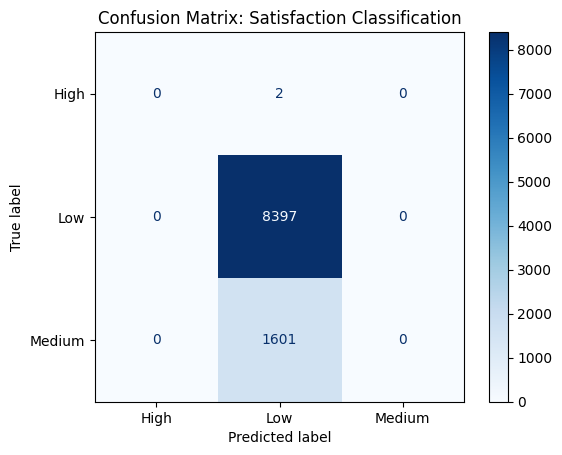

In [32]:
coefficients = lr_satisfaction_model.coef_[0]
features = X_satisfaction.columns

plt.figure(figsize=(8, 5))
plt.bar(features, coefficients, color='lightblue', edgecolor='black')
plt.title('Feature Importance in Satisfaction Classification')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr_satisfaction_model, X_test_satisfaction, y_test_satisfaction, cmap='Blues')
plt.title('Confusion Matrix: Satisfaction Classification')
plt.show()


# Classification 

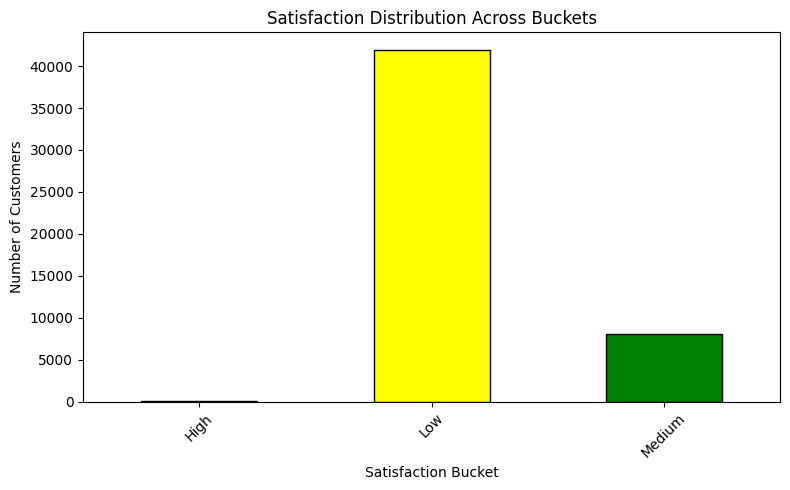

C:\Users\jcbur\AppData\Local\Temp\ipykernel_13436\3412094404.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


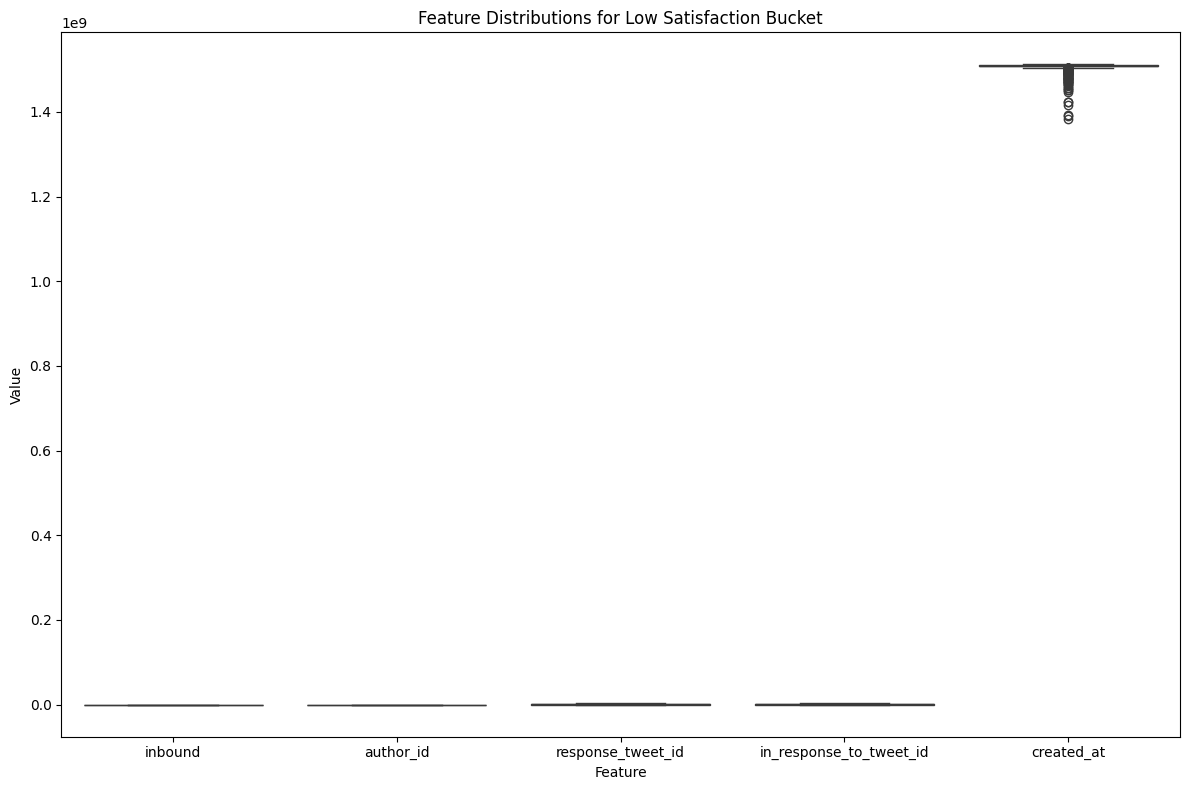

C:\Users\jcbur\AppData\Local\Temp\ipykernel_13436\3412094404.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


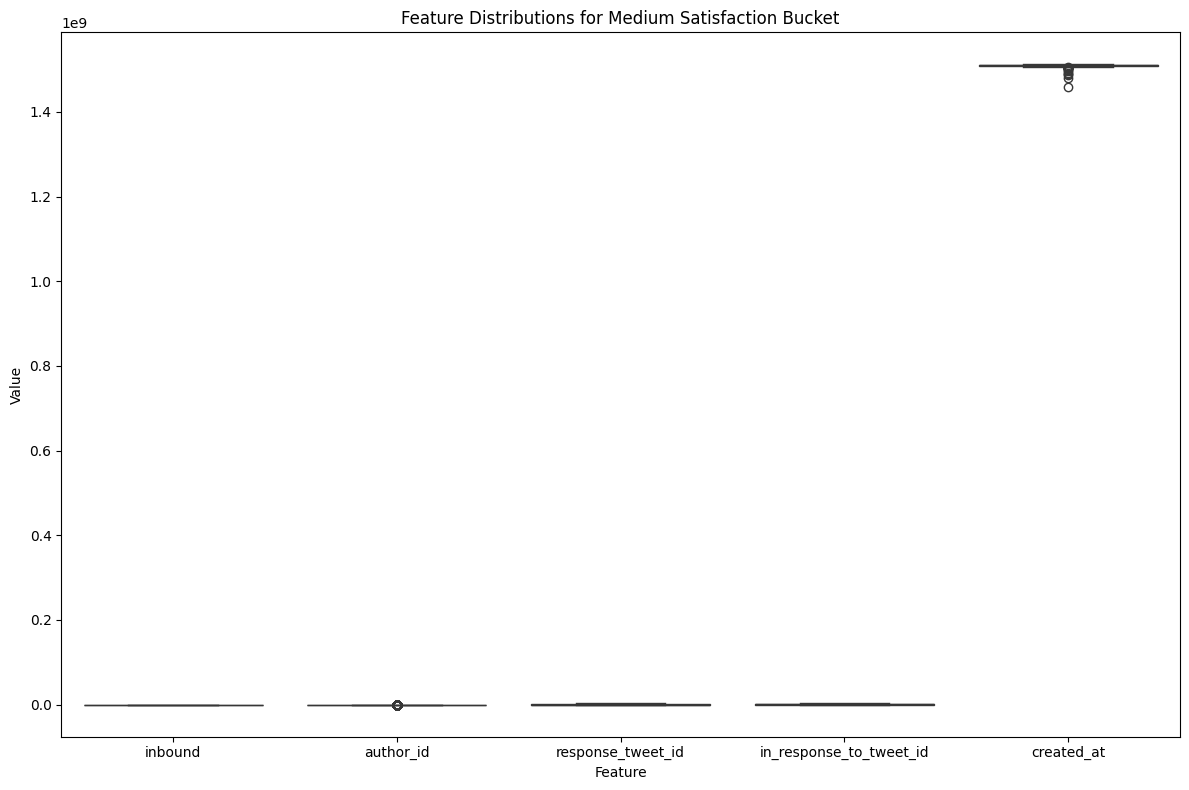

C:\Users\jcbur\AppData\Local\Temp\ipykernel_13436\3412094404.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


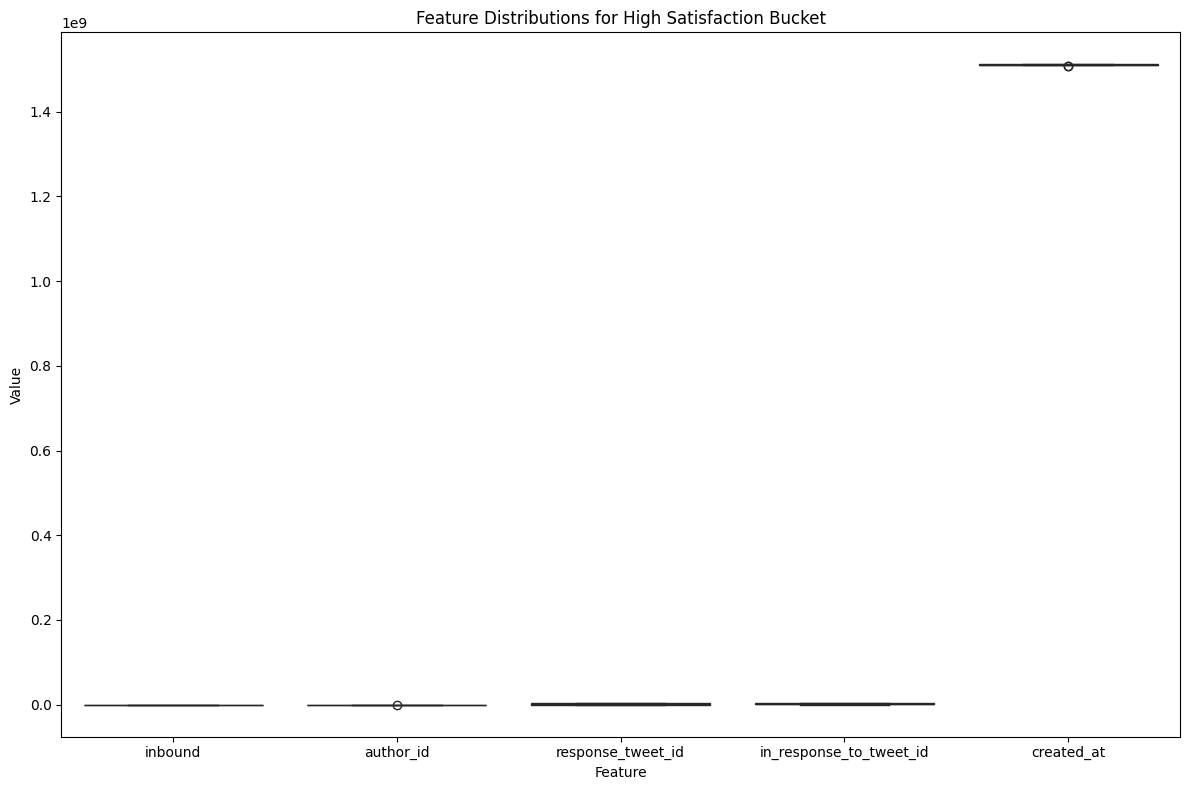

In [33]:
# Plot 1: Satisfaction Distribution Across Buckets
plt.figure(figsize=(8, 5))
data['satisfaction_bucket'] = y_satisfaction  # Add buckets for visualization
data['satisfaction_bucket'].value_counts().sort_index().plot(
    kind='bar', color=['red', 'yellow', 'green'], edgecolor='black'
)
plt.title("Satisfaction Distribution Across Buckets")
plt.xlabel("Satisfaction Bucket")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Feature Distribution for Low Satisfaction Bucket
low_satisfaction = data[data['satisfaction_bucket'] == 'Low']
features_to_analyze = ['inbound', 'author_id', 'response_tweet_id', 'in_response_to_tweet_id', 'created_at']
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=low_satisfaction[features_to_analyze].melt(var_name='Feature', value_name='Value'),
    x='Feature', y='Value', palette='Reds'
)
plt.title("Feature Distributions for Low Satisfaction Bucket")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

# Plot 3: Feature Distribution for Medium Satisfaction Bucket
medium_satisfaction = data[data['satisfaction_bucket'] == 'Medium']
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=medium_satisfaction[features_to_analyze].melt(var_name='Feature', value_name='Value'),
    x='Feature', y='Value', palette='Oranges'
)
plt.title("Feature Distributions for Medium Satisfaction Bucket")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

# Plot 4: Feature Distribution for High Satisfaction Bucket
high_satisfaction = data[data['satisfaction_bucket'] == 'High']
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=high_satisfaction[features_to_analyze].melt(var_name='Feature', value_name='Value'),
    x='Feature', y='Value', palette='Greens'
)
plt.title("Feature Distributions for High Satisfaction Bucket")
plt.ylabel("Value")
plt.tight_layout()
plt.show()


    # Feature distribution by satisfaction bucket 

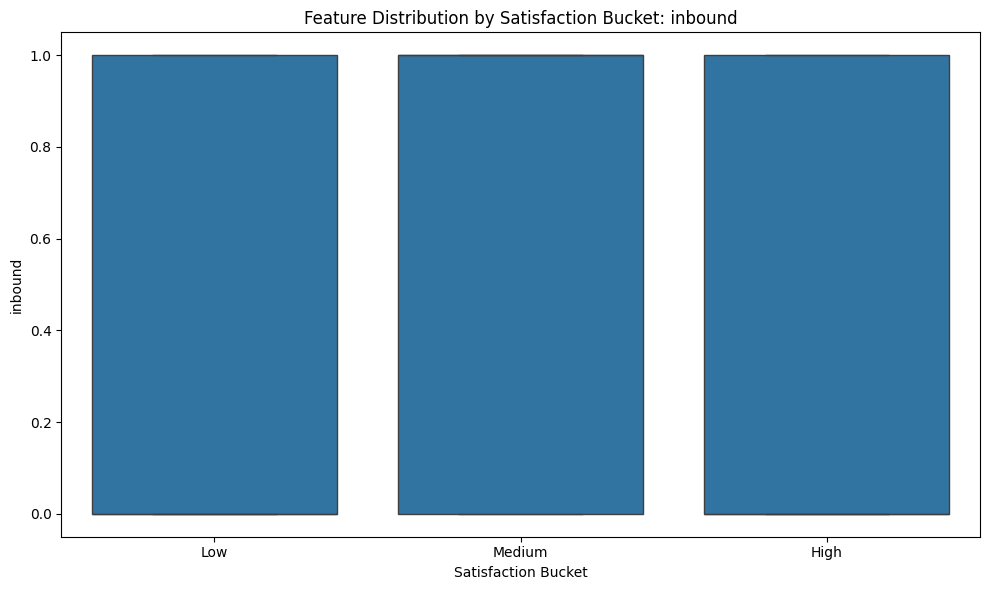

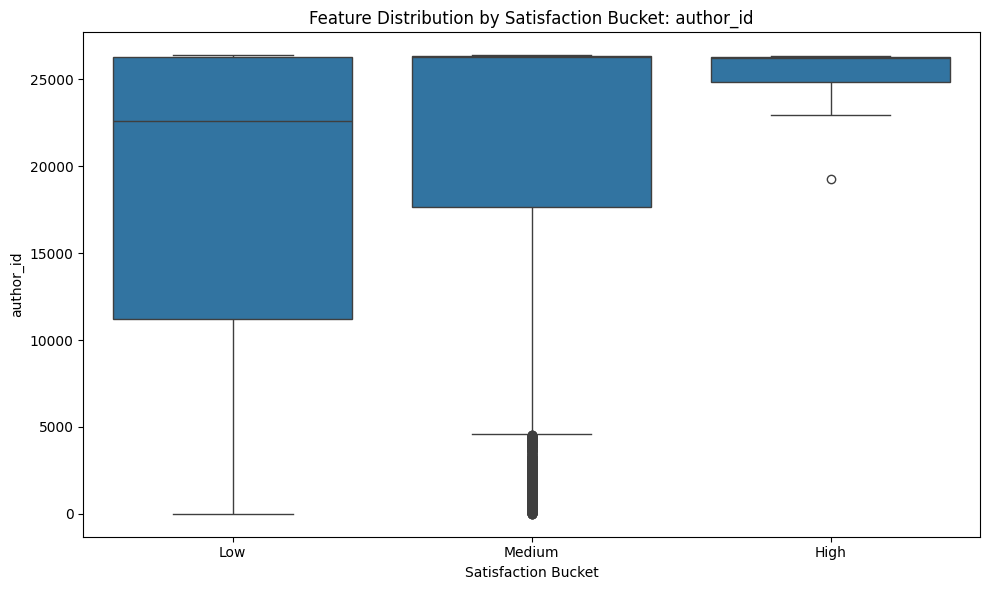

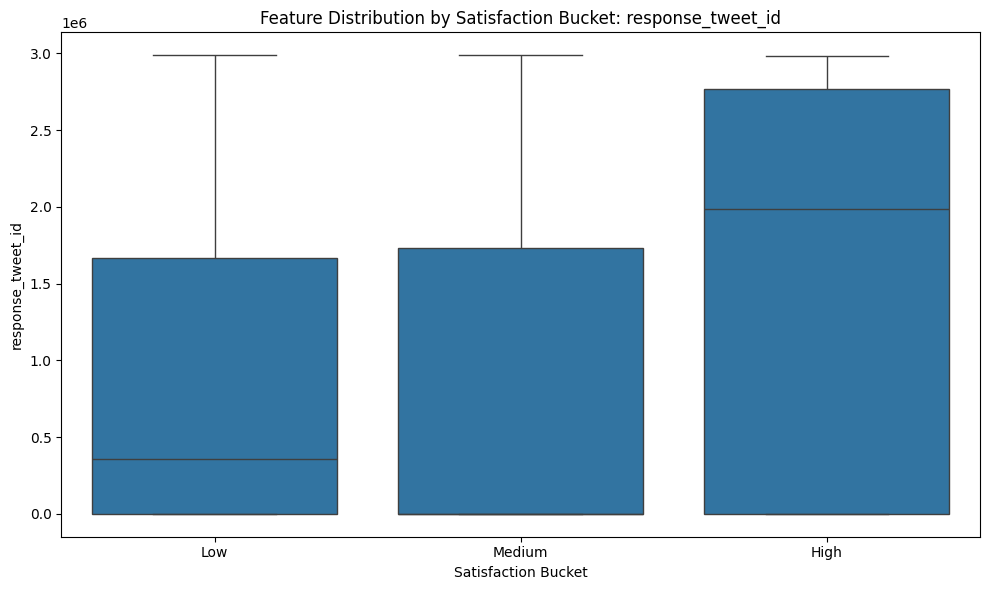

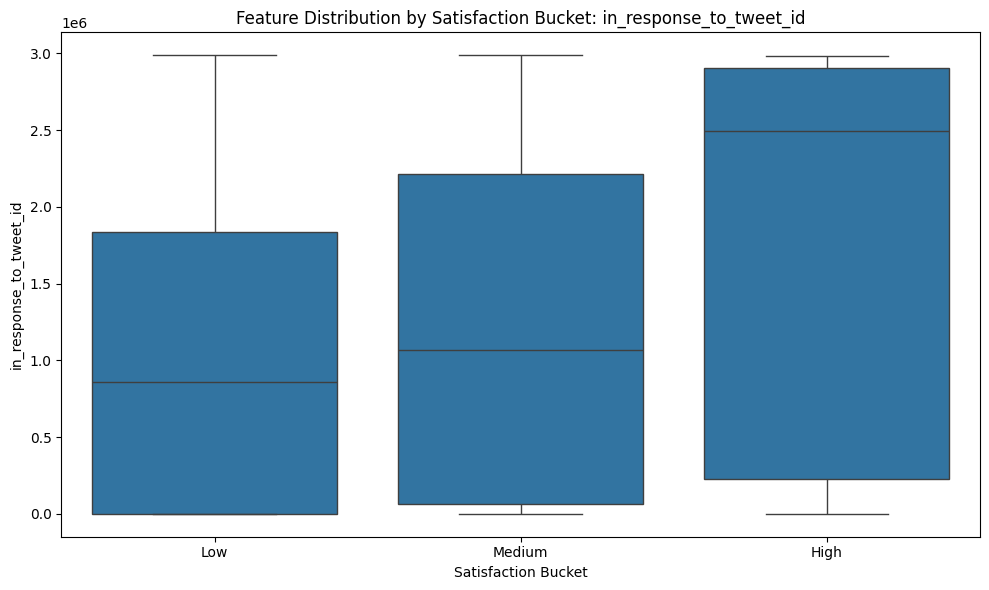

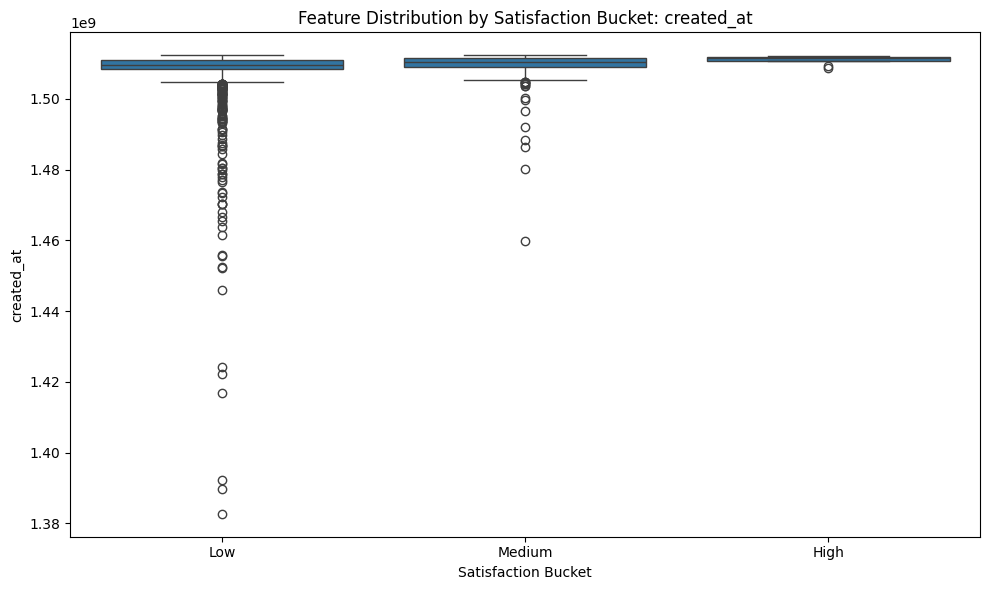

In [34]:
for feature in features_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='satisfaction_bucket', y=feature, data=data)
    plt.title(f'Feature Distribution by Satisfaction Bucket: {feature}')
    plt.xlabel('Satisfaction Bucket')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

# Customer Service Improvement Recommendations
     - Random Forest

In [35]:
# Prepare data for Random Forest Analysis
X_improvement = data[['inbound', 'created_at', 'response_tweet_id', 'in_response_to_tweet_id']]
y_improvement = pd.cut(data['satisfaction'], bins=[-1, 0.33, 0.67, 1], labels=['Low', 'Medium', 'High']).astype(str)

# Train Random Forest model for recommendation insights
rf_improvement_model = RandomForestClassifier(random_state=42)
rf_improvement_model.fit(X_improvement, y_improvement)

# Feature Importance for Insights
improvement_importances = rf_improvement_model.feature_importances_
features = X_improvement.columns

# Extract Recommendations for Low Satisfaction Bucket
low_satisfaction = data[data['satisfaction_bucket'] == 'Low']



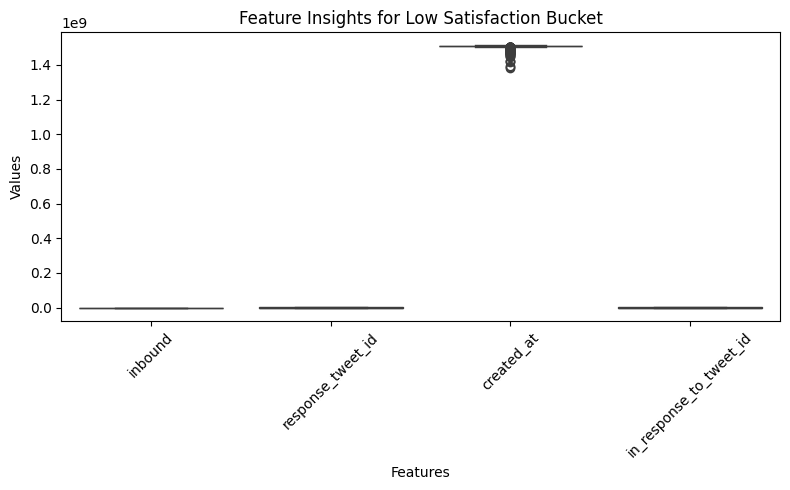

--- Recommendations for Low Satisfaction Bucket ---
3. Expedite responses to older queries for Low satisfaction customers.


In [36]:
# Check and analyze 'Low satisfaction' bucket
if 'created_at' in data.columns:
    low_satisfaction = data[data['satisfaction_bucket'] == 'Low']
    
    if low_satisfaction.empty:
        print("No data available for Low satisfaction bucket.")
    else:
        # Plot feature insights for Low satisfaction bucket
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=low_satisfaction[['inbound', 'response_tweet_id', 'created_at', 'in_response_to_tweet_id']])
        plt.title('Feature Insights for Low Satisfaction Bucket')
        plt.xlabel('Features')
        plt.ylabel('Values')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Recommendations based on Low satisfaction analysis
        print("--- Recommendations for Low Satisfaction Bucket ---")
        if low_satisfaction['inbound'].mean() > 0.5:
            print("1. Review inbound communication processes for customers with Low satisfaction.")
        if low_satisfaction['response_tweet_id'].median() == -1:
            print("2. Address response gaps for Low satisfaction customers.")
        if low_satisfaction['created_at'].mean() < data['created_at'].mean():
            print("3. Expedite responses to older queries for Low satisfaction customers.")
else:
    print("Error: 'created_at' column not found in the dataset.")
